In [7]:
from transformers import AutoTokenizer, AutoModel


In [33]:
dbert = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(dbert)
model = AutoModel.from_pretrained(dbert, output_attentions=True)

inputs = tokenizer("Hello I'm a student model", return_tensors="pt")
outputs = model(**inputs)

attentions = outputs.attentions
print(attentions[0].shape)
print(len(attentions))

torch.Size([1, 12, 9, 9])
6


In [27]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

attn_mean = [a.mean(dim=0) for a in attentions] # 各層のhead平均

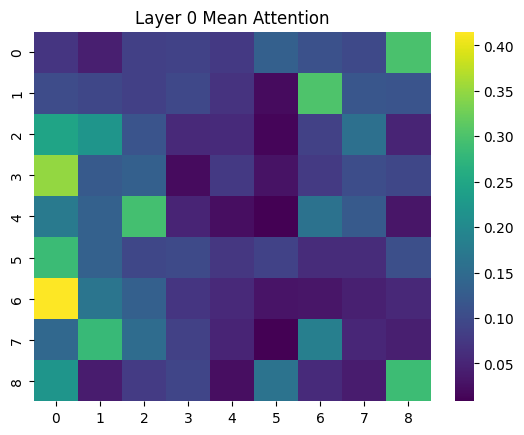

In [ ]:
sns.heatmap(attn_mean[0][0].detach().numpy(), cmap="viridis")
plt.title("Layer 0 Mean Attention")
plt.show()


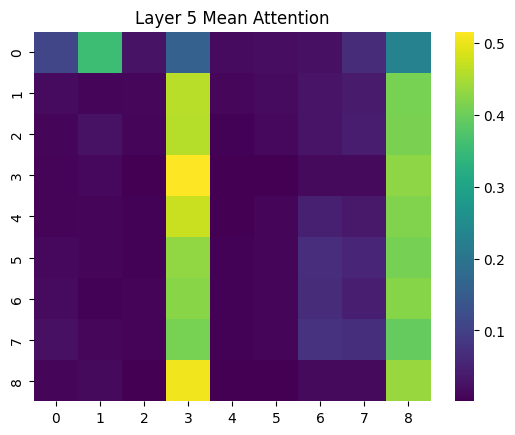

In [35]:
sns.heatmap(attn_mean[-1][0].detach().numpy(), cmap="viridis")
plt.title("Layer 5 Mean Attention")
plt.show()

In [36]:
tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])


['[CLS]', 'hello', 'i', "'", 'm', 'a', 'student', 'model', '[SEP]']

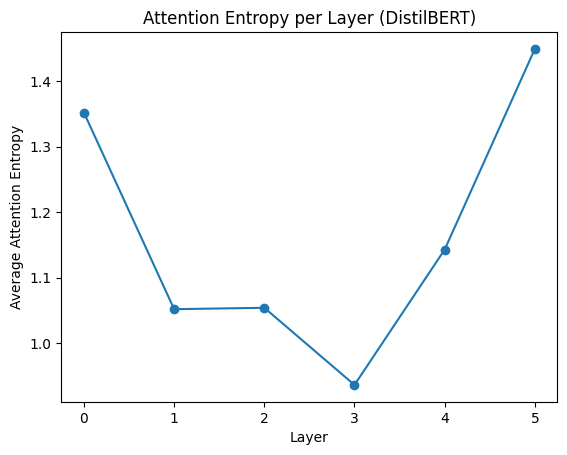

In [40]:
import matplotlib.pyplot as plt

entropies = []
for layer_attn in attentions:
    attn = layer_attn.mean(dim=0)

    p = attn / attn.sum(dim=-1, keepdim=True) # 確率的な
    p = torch.clamp(p, min=1e-12)

    entropy = -(p * p.log()).sum(dim=-1).mean().item()
    entropies.append(entropy)

plt.plot(range(len(entropies)), entropies, marker='o')
plt.xlabel("Layer")
plt.ylabel("Average Attention Entropy")
plt.title("Attention Entropy per Layer (DistilBERT)")
plt.show()


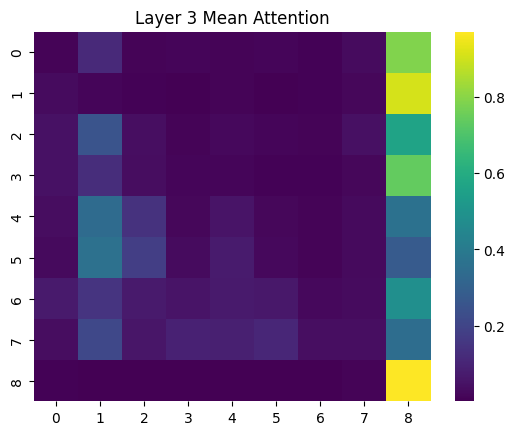

In [41]:
sns.heatmap(attn_mean[3][0].detach().numpy(), cmap="viridis")
plt.title("Layer 3 Mean Attention")
plt.show()